# TP1: Méthodes d'optimisation en 1D

## 1. Méthode de la dichotomie

1. Quelle équation souhaite-t-on résoudre pour notre problème d'optimisation ? Quelles conditions doit-on vérifier pour $f$ pour appliquer la méthode de dichotomie ?

2. Ecrire l'algorithme de la méthode de la dichotomie pour trouver le minimum de la fonction $f(x) = x^2 - 2 \sin(x)$ sur $[0, 2]$ avec une précision de $10^{-5}$.
Comment obtient-on le nombre d'itérations à partir de la précision ?

3. Comparer votre code avec l’implémentation de `scipy.optimize.bisect`. Que remarquez-vous ?


1. On souhaite résoudre l'équation $f'(x) = 0$ pour trouver le minimum de $f$. Pour appliquer la méthode de dichotomie, $f$ doit être unimodale sur $[a, b]$, continue et vérifier $f(a) * f(b) < 0$.

2. On commence par importer les librairies nécessaires et définir la fonction $f$.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.optimize import golden

In [2]:
# Define the function to minimise
def f(x):
    return x**2 - 2 * np.sin(x)

2. Ensuite on définit la fonction `dichotomie` qui prend en argument la fonction $f$, les bornes $a$ et $b$ de l'intervalle sur lequel on cherche le minimum, et la précision $\varepsilon$. Puis on l'applique sur notre fonction $f$.

In [3]:
# Define the dichotomous search algorithm
def dichotomie(f, a, b, epsilon):
    while b - a > epsilon:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

In [4]:
# Define the search conditions
a = 0
b = 2
epsilon = 1e-5

In [5]:
# Define the derivative of the function
def df(x):
    return 2 * x - 2 * np.cos(x)

In [6]:
# Apply the search algorithm to the function
x_min = dichotomie(df, a, b, epsilon)
print('The minimum of the function is at x =', x_min)

The minimum of the function is at x = 0.7390861511230469


2. Pour obtenir le nombre d'itérations à partir de la précision, on utilise la formule $$n = \frac{\log(\frac{b - a}{\varepsilon})}{\log(2)}.$$

3. On remarque que la méthode de dichotomie de `scipy.optimize.bisect` donne le même résultat. Un test plus avancé avec des fonctions plus complexes pourrait montrer des différences en termes de performances.

In [7]:
# Comparison with the scipy library
x_min_bisect = bisect(df, a, b, rtol=epsilon)
print('The minimum of the function is at x =', x_min_bisect)

The minimum of the function is at x = 0.7390861511230469


## 2. Méthode de Newton

4. Quelle condition doit vérifier $f$ pour appliquer la méthode de Newton pour le problème d'optimisation ? Comment va être formulé l'itéré de Newton dans ce cas ?

5. Ecrire l'algorithme de Newton dans ce cas et l'appliquer à la fonction $f(x) = x^2 - 2 \sin(x)$ avec $x_0 = 1$.

4. Pour appliquer la méthode de Newton, $f$ doit être deux fois dérivable et $f''$ doit être continue. L'itéré de Newton est donné par la formule $$x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}.$$

5. On définit la fonction `newton` qui prend en argument la dérivée première `df`, la dérivée seconde `df2`, la valeur initiale `x0` et la précision `epsilon`. Puis on l'applique sur notre fonction $f$.

In [8]:
# Define the Newton search algorithm
def newton(df, df2, x0, epsilon):
    x = x0
    while abs(df(x)) > epsilon:
        x = x - df(x) / df2(x)
    return x

In [9]:
# Define the search conditions
x0 = 1
epsilon = 1e-5

In [10]:
# Define the function to minimise and its derivatives
def f(x):
    return x**2 - 2 * np.sin(x)


def df(x):
    return 2 * x - 2 * np.cos(x)


def df2(x):
    return 2 + 2 * np.sin(x)

In [11]:
# Apply the search algorithm to the function
x_min = newton(df, df2, x0, epsilon)
print('The minimum of the function is at x =', x_min)

The minimum of the function is at x = 0.739085133385284


5. On remarque que la méthode de Newton converge plus rapidement que la méthode de dichotomie. Cependant, elle nécessite des conditions plus restrictives sur la fonction $f$. Dans le cas de la dichotomie, $f$ doit être unimodale, tandis que pour Newton, $f$ doit être deux fois dérivable.

## 3. Méthode de la section dorée

6. Ecrire l’algorithme et l’appliquer à la fonction $f(x) = x^2 - 2 \sin(x)$.

7. Comparer votre code avec l’implémentation de `scipy.optimize.golden`.

8. Comparer les 3 méthodes pour $f(x) = -\frac{1}{x} + \cos(x)$ sur $[a, b] = [2; 4]$ ou pour $x_0 = 2.5$ au niveau du nombre d’itérations et du temps de calcul. Représenter le graphique de la fonction en plaçant les résultats des itérations successives de Newton.

6. On définit la fonction `golden` qui prend en argument la fonction $f$, les bornes $a$ et $b$ de l'intervalle sur lequel on cherche le minimum, et la précision $\varepsilon$. Puis on l'applique sur notre fonction $f$.

In [12]:
# Define the golden search algorithm
def golden(f, a, b, epsilon):
    rho = (1 + np.sqrt(5)) / 2
    x1 = 1 / rho * a + (1 - 1 / rho) * b
    x2 = (1 - 1 / rho) * a + 1 / rho * b
    while b - a > epsilon:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = 1 / rho * a + (1 - 1 / rho) * b
        else:
            a = x1
            x1 = x2
            x2 = (1 - 1 / rho) * a + 1 / rho * b
    return (a + b) / 2

In [13]:
# Define the search conditions
a = 0
b = 2
epsilon = 1e-5

In [14]:
# Apply the search algorithm to the function
x_min = golden(f, a, b, epsilon)
print('The minimum of the function is at x =', x_min)

The minimum of the function is at x = 0.7390861927011781


7. On remarque que la méthode de la section dorée de `scipy.optimize.golden` donne le même résultat. Un test plus avancé avec des fonctions plus complexes pourrait montrer des différences en termes de performances.

In [15]:
# Comparison with the scipy library
x_min_golden = golden(f, a, b, epsilon)
print('The minimum of the function is at x =', x_min_golden)

The minimum of the function is at x = 0.7390861927011781


8. On définit la fonction $f$ et on applique les 3 méthodes sur $f(x) = -\frac{1}{x} + \cos(x)$ avec $[a, b] = [2; 4]$ ou $x_0 = 2.5$. On compare les 3 méthodes en termes de nombre d'itérations et de temps de calcul. On représente le graphique de la fonction en plaçant les résultats des itérations successives de Newton. Pour cela on va devoir réécrire les fonctions `dichotomie`, `newton` et `golden` pour qu'elles retournent le nombre d'itérations et les valeurs successives de $x$.

In [16]:
# Define the function to minimise and its derivatives
def f(x):
    return - 1 / x + np.cos(x)

def df(x):
    return 1 / x**2 + np.sin(x)

def df2(x):
    return -2 / x**3 + np.cos(x)

In [17]:
# Define the search conditions
a = 2
b = 4
x0 = 2.5
epsilon = 1e-5

In [18]:
# Redefine the search algorithms to return the number of iterations
def dichotomie(f, a, b, epsilon):
    n = 0
    while b - a > epsilon:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        n += 1
    return (a + b) / 2, n


def newton(df, df2, x0, epsilon):
    x = x0
    n = 0
    while abs(df(x)) > epsilon:
        x = x - df(x) / df2(x)
        n += 1
    return x, n


def golden(f, a, b, epsilon):
    rho = (1 + np.sqrt(5)) / 2
    x1 = 1 / rho * a + (1 - 1 / rho) * b
    x2 = (1 - 1 / rho) * a + 1 / rho * b
    n = 0
    while b - a > epsilon:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = 1 / rho * a + (1 - 1 / rho) * b
        else:
            a = x1
            x1 = x2
            x2 = (1 - 1 / rho) * a + 1 / rho * b
        n += 1
    return (a + b) / 2, n

In [19]:
# Apply the search algorithms to the function
x_min_dicho, n_dicho = dichotomie(df, a, b, epsilon)
print('The minimum of the function is at x =', x_min_dicho, 'after', n_dicho, 'iterations')

x_min_newt, n_newt = newton(df, df2, x0, epsilon)
print('The minimum of the function is at x =', x_min_newt, 'after', n_newt, 'iterations')

x_min_gold, n_gold = golden(f, a, b, epsilon)
print('The minimum of the function is at x =', x_min_gold, 'after', n_gold, 'iterations')

The minimum of the function is at x = 3.237163543701172 after 18 iterations
The minimum of the function is at x = 3.2371648550248726 after 3 iterations
The minimum of the function is at x = 3.0326441743922623 after 26 iterations


8. On remarque que la méthode de Newton converge plus rapidement que les autres méthodes. Cependant, elle nécessite des conditions plus restrictives sur la fonction $f$. Dans le cas de la dichotomie, $f$ doit être unimodale, tandis que pour Newton, $f$ doit être deux fois dérivable. La méthode de la section dorée est plus lente que les autres méthodes, mais elle ne nécessite pas de conditions restrictives sur $f$.

Pour la représentation graphique, on utilise la fonction `plot` de `matplotlib.pyplot` pour afficher la fonction $f$ et la fonction `scatter` pour afficher les résultats des itérations successives de Newton.
On va devoir réécrire les fonctions `dichotomie`, `newton` et `golden` pour qu'elles retournent le nombre d'itérations et les valeurs successives de $x$.

In [20]:
# Redefine the search algorithms to return the successive approximations
def dichotomie(f, a, b, epsilon):
    x = []
    while b - a > epsilon:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        x.append((a + b) / 2)
    return x


def newton(df, df2, x0, epsilon):
    x = x0
    x_list = []
    while abs(df(x)) > epsilon:
        x = x - df(x) / df2(x)
        x_list.append(x)
    return x_list


def golden(f, a, b, epsilon):
    rho = (1 + np.sqrt(5)) / 2
    x1 = 1 / rho * a + (1 - 1 / rho) * b
    x2 = (1 - 1 / rho) * a + 1 / rho * b
    x = []
    while b - a > epsilon:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = 1 / rho * a + (1 - 1 / rho) * b
        else:
            a = x1
            x1 = x2
            x2 = (1 - 1 / rho) * a + 1 / rho * b
        x.append((a + b) / 2)
    return x

In [21]:
# Apply the search algorithms to the function
x_min_dicho = dichotomie(df, a, b, epsilon)
print('The minimum of the function is at x =', x_min_dicho[-1], 'after', len(x_min_dicho), 'iterations')

x_min_newt = newton(df, df2, x0, epsilon)
print('The minimum of the function is at x =', x_min_newt[-1], 'after', len(x_min_newt), 'iterations')

x_min_gold = golden(f, a, b, epsilon)
print('The minimum of the function is at x =', x_min_gold[-1], 'after', len(x_min_gold), 'iterations')


The minimum of the function is at x = 3.237163543701172 after 18 iterations
The minimum of the function is at x = 3.2371648550248726 after 3 iterations
The minimum of the function is at x = 3.0326441743922623 after 26 iterations


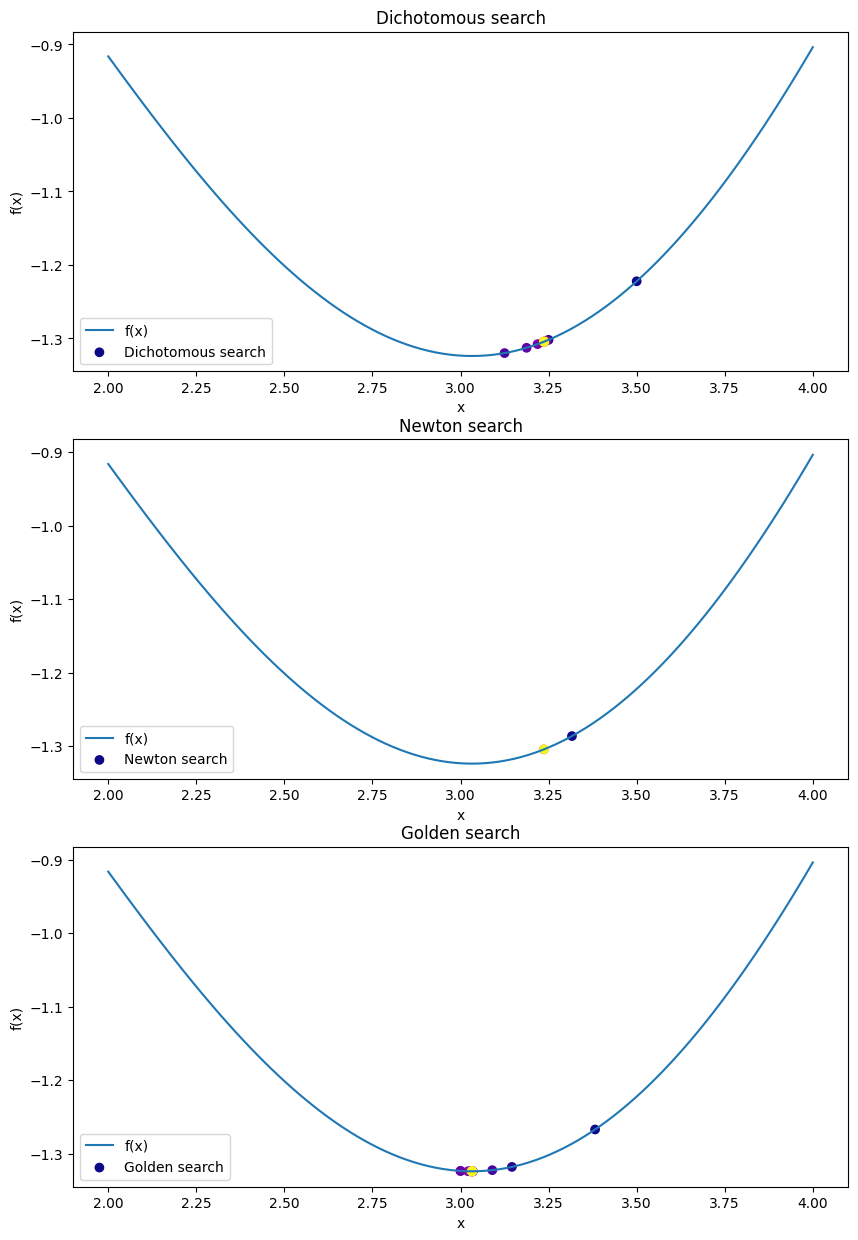

In [22]:
# Graph the function and the search algorithms
x = np.linspace(a, b, 100)
y = f(x)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Dichotomous search
ax[0].plot(x, y, label='f(x)')
ax[0].scatter(x_min_dicho, [f(x) for x in x_min_dicho], c=range(len(x_min_dicho)), cmap='plasma', label='Dichotomous search')
ax[0].set_title('Dichotomous search')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].legend()

# Newton search
ax[1].plot(x, y, label='f(x)')
ax[1].scatter(x_min_newt, [f(x) for x in x_min_newt], c=range(len(x_min_newt)), cmap='plasma', label='Newton search')
ax[1].set_title('Newton search')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].legend()

# Golden search
ax[2].plot(x, y, label='f(x)')
ax[2].scatter(x_min_gold, [f(x) for x in x_min_gold], c=range(len(x_min_gold)), cmap='plasma', label='Golden search')
ax[2].set_title('Golden search')
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
ax[2].legend()

# Save the plot with high resolution
plt.savefig('search_algorithms.png', dpi=300)

# Display the plot
plt.show()


8. On peut aussi comparer ces méthodes sur la fonction $f(x) = x^2 - 2 \sin(x)$ pour voir si les conclusions sont les mêmes.

In [23]:
# Define the function to minimise and its derivatives
def f(x):
    return x**2 - 2 * np.sin(x)


def df(x):
    return 2 * x - 2 * np.cos(x)


def df2(x):
    return 2 + 2 * np.sin(x)

In [24]:
# Define the search conditions
a = 0
b = 2
x0 = 1
epsilon = 1e-5

In [25]:
# Apply the search algorithms to the function
x_min_dicho = dichotomie(df, a, b, epsilon)
print('The minimum of the function is at x =', x_min_dicho, 'after', len(x_min_dicho), 'iterations')

x_min_newt = newton(df, df2, x0, epsilon)
print('The minimum of the function is at x =', x_min_newt, 'after', len(x_min_newt), 'iterations')

x_min_gold = golden(f, a, b, epsilon)
print('The minimum of the function is at x =', x_min_gold, 'after', len(x_min_gold), 'iterations')

The minimum of the function is at x = [0.5, 0.75, 0.625, 0.6875, 0.71875, 0.734375, 0.7421875, 0.73828125, 0.740234375, 0.7392578125, 0.73876953125, 0.739013671875, 0.7391357421875, 0.73907470703125, 0.739105224609375, 0.7390899658203125, 0.7390823364257812, 0.7390861511230469] after 18 iterations
The minimum of the function is at x = [0.7503638678402439, 0.7391128909113617, 0.739085133385284] after 3 iterations
The minimum of the function is at x = [0.6180339887498948, 0.8541019662496845, 0.7082039324993691, 0.7983738762488434, 0.7426457862480021, 0.7082039324993692, 0.7294901687515774, 0.7426457862480023, 0.7345151674922188, 0.7395401662328603, 0.7364345462177184, 0.738353924943218, 0.7395401662328603, 0.738807028797003, 0.7392601326507877, 0.7389800990687152, 0.7391531693404274, 0.7390462060300671, 0.739112312991419, 0.7390714566424106, 0.7390967072547541, 0.7390811015180889, 0.7390907463937675, 0.7390847855327809, 0.7390884695474729, 0.7390861927011781] after 26 iterations


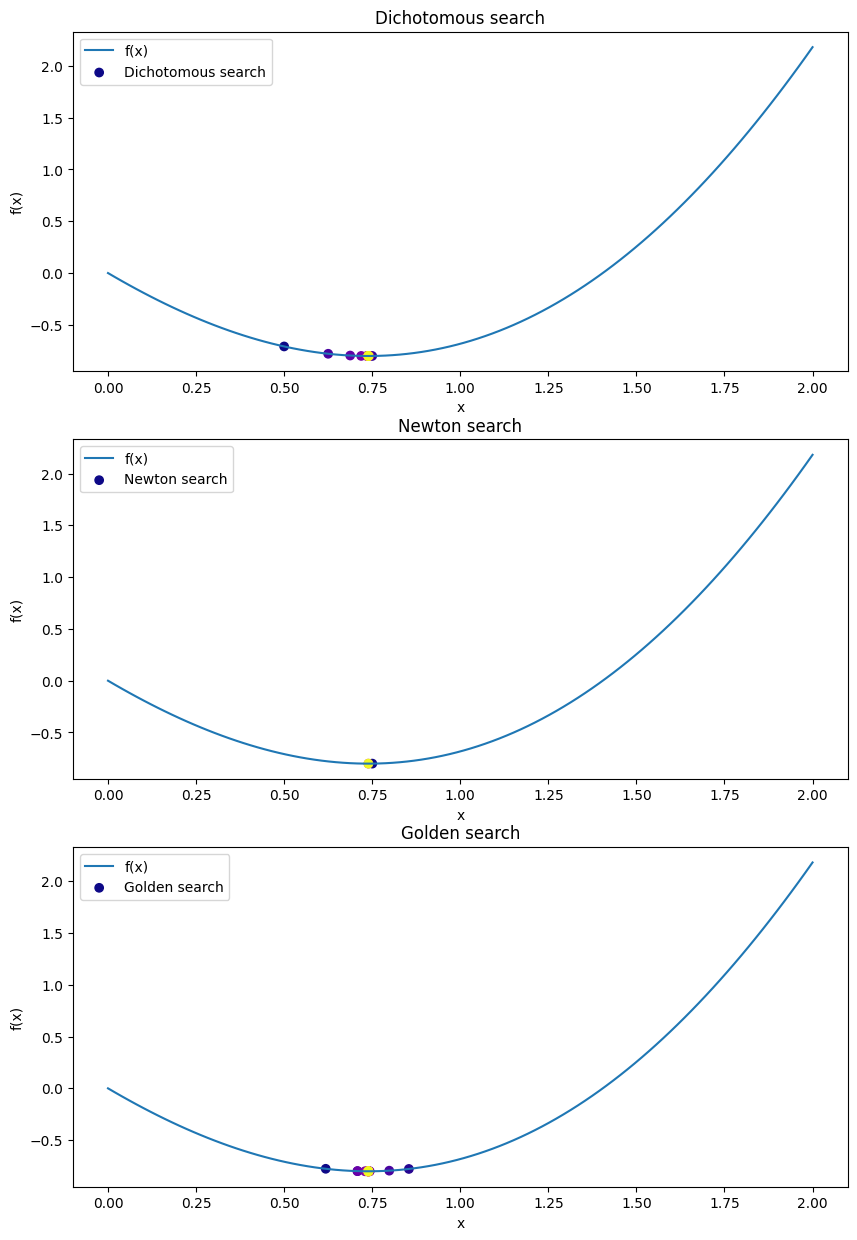

In [26]:
# Graph the function and the search algorithms
x = np.linspace(a, b, 100)
y = f(x)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Dichotomous search
ax[0].plot(x, y, label='f(x)')
ax[0].scatter(x_min_dicho, [f(x) for x in x_min_dicho], c=range(len(x_min_dicho)), cmap='plasma', label='Dichotomous search')
ax[0].set_title('Dichotomous search')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].legend()

# Newton search
ax[1].plot(x, y, label='f(x)')
ax[1].scatter(x_min_newt, [f(x) for x in x_min_newt], c=range(len(x_min_newt)), cmap='plasma', label='Newton search')
ax[1].set_title('Newton search')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].legend()

# Golden search
ax[2].plot(x, y, label='f(x)')
ax[2].scatter(x_min_gold, [f(x) for x in x_min_gold], c=range(len(x_min_gold)), cmap='plasma', label='Golden search')
ax[2].set_title('Golden search')
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
ax[2].legend()

# Save the plot with high resolution
plt.savefig('search_algorithms_2.png', dpi=300)

# Display the plot
plt.show()